# 1. Tools for text processing

**requests** is a library for making HTTP requests

**Beautiful Soup** is a library that makes it easy to scrape information from web pages

In [ ]:
# Importing requests, BeautifulSoup and nltk
# Natural Language Toolkit (nltk)
import requests
from bs4 import BeautifulSoup
import nltk

# 2. Request Moby Dick

HTML file: https://aws.amazon.com/s3/


utf-8 : translate any Unicode character to a matching unique binary string

In [ ]:
r= requests.get("https://aws.amazon.com/solutions/case-studies/runtastic-case-study-2022/")

r.encoding = 'utf-8'

html = r.text

html[:2000]

'<!doctype html>\n<html class="no-js aws-lng-en_US aws-with-target" lang="en-US" data-static-assets="https://a0.awsstatic.com" data-js-version="1.0.572" data-css-version="1.0.493">\n <head> \n  <meta http-equiv="Content-Security-Policy" content="default-src \'self\' data: https://a0.awsstatic.com; connect-src \'self\' https://*.analytics.console.aws.a2z.com https://*.prod.chc-features.uxplatform.aws.dev https://112-tzm-766.mktoresp.com https://112-tzm-766.mktoutil.com https://a0.awsstatic.com https://a0.p.awsstatic.com https://a1.awsstatic.com https://amazonwebservices.d2.sc.omtrdc.net https://amazonwebservicesinc.tt.omtrdc.net https://api.regional-table.region-services.aws.a2z.com https://api.us-west-2.prod.pricing.aws.a2z.com https://auth.aws.amazon.com https://aws.amazon.com https://aws.amazon.com/p/sf/ https://aws.demdex.net https://b0.p.awsstatic.com https://c0.b0.p.awsstatic.com https://calculator.aws https://chat.us-east-1.prod.mrc-sunrise.marketing.aws.dev https://chatbot-api.u

# 3. Get the text from the HTML

soup = BeautifulSoup(html_doc, 'html.parser')

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
soup = BeautifulSoup(html,"lxml")

text = soup.get_text()

text[32000:34000]

''

# 4. Extract the words

tokenizer = RegexpTokenizer(r'\w+ matches one or more alphanumeric characters. ')


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

tokens = tokenizer.tokenize(text=text)

tokens[:15]


['Runtastic',
 'Case',
 'Study',
 'Skip',
 'to',
 'main',
 'content',
 'Click',
 'here',
 'to',
 'return',
 'to',
 'Amazon',
 'Web',
 'Services']

# 5. Make the words lowercase

In [ ]:
words = [token.lower() for token in tokens]

# Printing out the first 8 words / tokens
words[:10]

['runtastic',
 'case',
 'study',
 'skip',
 'to',
 'main',
 'content',
 'click',
 'here',
 'to']

# 6. Load in stop words

In [ ]:
#get stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw = nltk.corpus.stopwords.words('english')

In [ ]:
sw[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']


# 7. Remove stop words in Moby Dick

Why do we remove stopwords in NLP?

Stopwords are removed in NLP to focus on the more meaningful and informative words in a text. This is often done to reduce noise, improve efficiency in processing, and highlight keywords that carry the essential meaning of the text

In [ ]:
words_ns = [word for word in words if word not in sw]

words_ns[:10]


['runtastic',
 'case',
 'study',
 'skip',
 'main',
 'content',
 'click',
 'return',
 'amazon',
 'web']

# 8. Visualisation

In [ ]:
%matplotlib inline

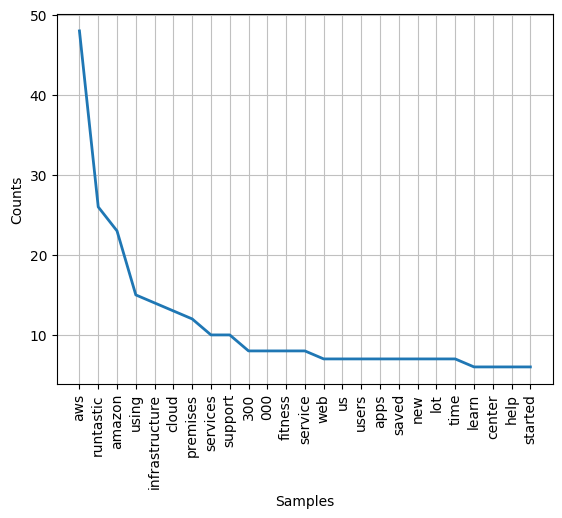

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
freqdist = nltk.FreqDist(words_ns)

freqdist.plot(25)

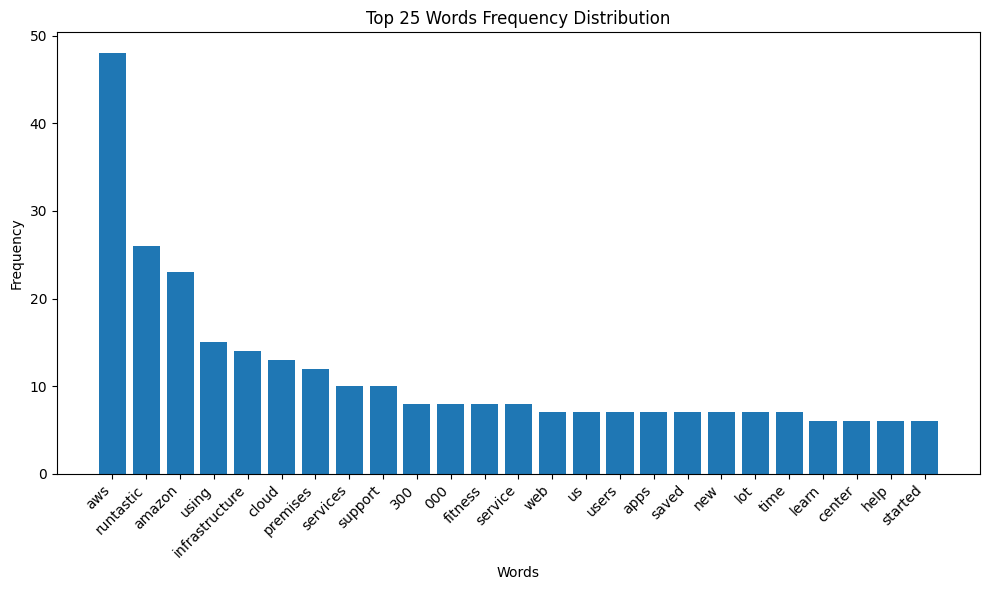

The most common word is 'aws' with a frequency of 48.


In [ ]:
import matplotlib.pyplot as plt

freqdist = nltk.FreqDist(words_ns)

top_words = freqdist.most_common(25)

words, frequencies = zip(*top_words)

most_common_word, most_common_frequency = freqdist.most_common(1)[0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Words Frequency Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

print(f"The most common word is '{most_common_word}' with a frequency of {most_common_frequency}.")